In [4]:
import numpy as mp


In [33]:
from itertools import combinations_with_replacement

class PolynomialRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.w = None

    def generate_polynomial_features(self, x):
        n_samples, n_features = x.shape
        features = np.ones((n_samples, 1))  # 切片項を考慮
        for d in range(1, self.degree + 1):
            for interaction in combinations_with_replacement(range(n_features), d):
                term = np.prod(x[:, interaction], axis=1).reshape(n_samples, 1)
                features = np.hstack((features, term))
        return features

    def fit(self, x, y):
        X_poly = self.generate_polynomial_features(x)
        self.w = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X_test):
        X_test_poly = self.generate_polynomial_features(X_test)
        return X_test_poly @ self.w


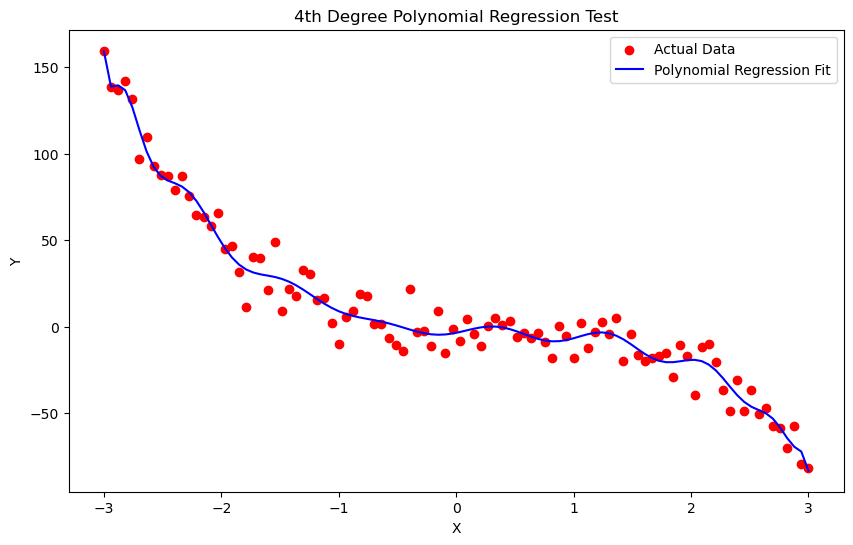

In [34]:
# 合成データの生成
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 - 2 * x + 3 * x**2 - 4 * x**3 + np.random.normal(0, 10, size=x.shape)

# 多項式回帰モデルのインスタンス化とフィット（4次の多項式）
model = PolynomialRegression(degree=20)
model.fit(x.reshape(-1, 1), y)

# 予測
x_pred = np.linspace(-3, 3, 100)
y_pred = model.predict(x_pred.reshape(-1, 1))

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Actual Data')
plt.plot(x_pred, y_pred, color='blue', label='Polynomial Regression Fit')
plt.title('4th Degree Polynomial Regression Test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

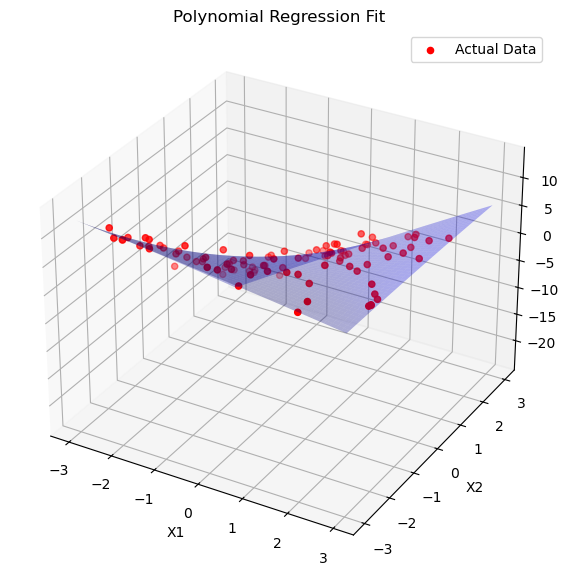

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PolynomialRegressionクラス定義はここに挿入

# 合成データセットの生成
np.random.seed(0)
x1 = np.random.uniform(-3, 3, 100)
x2 = np.random.uniform(-3, 3, 100)
y = 1 + 2*x1 - 3*x2 + 1*x1*x2 + np.random.normal(0, 1, 100)

# 2つの特徴量を列方向にスタックして特徴量行列Xを作成
X = np.vstack((x1, x2)).T

# 多項式回帰モデルのインスタンス化とフィット
model = PolynomialRegression(degree=2)
model.fit(X, y)

# 予測のためのグリッド生成
x1_grid, x2_grid = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
X_grid = np.vstack((x1_grid.ravel(), x2_grid.ravel())).T

# グリッド上での予測
y_pred = model.predict(X_grid).reshape(x1_grid.shape)

# 3Dプロットの生成
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 散布図で元のデータをプロット
ax.scatter(x1, x2, y, color='red', label='Actual Data')

# 曲面で予測結果をプロット
ax.plot_surface(x1_grid, x2_grid, y_pred, color='blue', alpha=0.3, edgecolor='none')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Polynomial Regression Fit')
ax.legend()

plt.show()
